C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22920\2493254992.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)  # Fill with the mode for categorical columns
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site

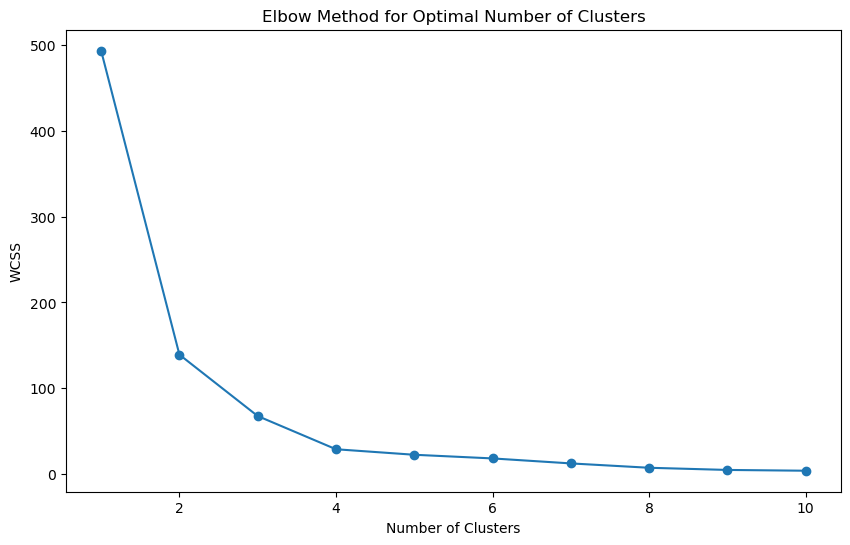

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


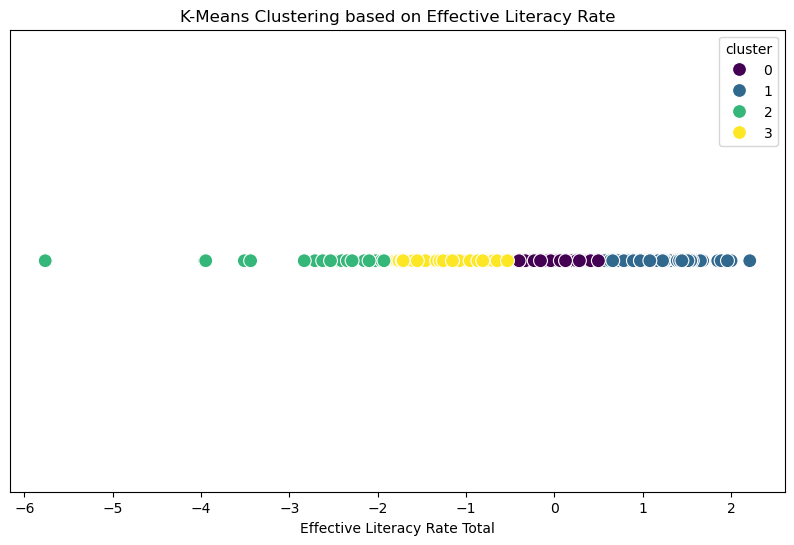

   name_of_city  effective_literacy_rate_total  cluster
0             0                      -0.852978        3
1             1                       1.109784        1
2             2                      -0.747801        3
3             3                      -0.270460        0
4             4                      -2.710562        2


In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
# Change the dataset path to its exact path
df = pd.read_csv('./Datasets/cities_r2.csv')

# Step 2: Data Preprocessing

# Handle missing values for numeric columns by filling with the mean
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Handle missing values for categorical columns by filling with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Fill with the mode for categorical columns

# Label Encoding for categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Step 3: Data Transformation

# Standardize the numeric features (scaling 'effective_literacy_rate_total')
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Step 4: Apply K-Means Clustering based on 'effective_literacy_rate_total'
X = df[['effective_literacy_rate_total']]  # Using 'effective_literacy_rate_total' for clustering

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[['total_graduates']])
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Applying KMeans with a chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Step 5: Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['effective_literacy_rate_total'], y=[0] * len(df), hue=df['cluster'], palette='viridis', s=100)
plt.title('K-Means Clustering based on Effective Literacy Rate')
plt.xlabel('Effective Literacy Rate Total')
plt.yticks([])
plt.show()

# Step 6: View the grouped data (city, literacy rate, and cluster label)
print(df[['name_of_city', 'effective_literacy_rate_total', 'cluster']].head())
